### Import library

In [2]:
import pandas as pd
import numpy as np
import csv
import collections
from scipy.stats import zscore
from datetime import datetime
#import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

import tensorflow as tf
#from numpy.random import seed
#seed(1)
import tensorflow as tf
#tf.random.set_seed(2)

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.layers import Conv1D, Conv2D, MaxPooling2D

Using TensorFlow backend.


### Persiapan Data
Data akan diunduh dari situs [alphavantage](https://www.alphavantage.co/documentation/)

In [3]:
# import data
data_tekin = pd.read_csv("MSFT dataset_fix.csv")
data_tekin = data_tekin.drop(["Chaikin A/D"], axis=1)
print(data_tekin.head())
print(data_tekin.tail())

         Date  Real Middle Band  Real Upper Band  Real Lower Band  Aroon Up  \
0  2000-06-19           67.0580          74.3798          59.7362       100   
1  2000-06-20           67.5955          75.5474          59.6436       100   
2  2000-06-21           68.4705          77.9880          58.9530       100   
3  2000-06-22           69.1860          79.8081          58.5639        95   
4  2000-06-23           69.9955          80.6189          59.3721        90   

   Aroon Down  MACD_Hist    MACD  MACD_Signal    SlowK    SlowD      ADX  \
0          25     1.0213  1.0200      -0.0013  95.1896  82.5549  16.2698   
1          20     1.0811  1.3500       0.2690  95.0161  92.3052  17.3044   
2          15     1.4263  2.0519       0.6256  93.3612  94.5223  19.0282   
3          10     1.5100  2.5130       1.0031  86.6472  91.6748  20.6658   
4           5     1.3349  2.6717       1.3368  73.7240  84.5775  21.6161   

      Close  
0  36.84375  
1  37.46875  
2  40.34375  
3  39.93750 

In [4]:
#import url (APO, PPO, BOP, OBV, HT_PHASOR, HT_DCPERIOD)
url_APO = "https://www.alphavantage.co/query?function=APO&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
url_PPO = "https://www.alphavantage.co/query?function=PPO&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
url_BOP = "https://www.alphavantage.co/query?function=BOP&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
#url_HT_PHASOR = "https://www.alphavantage.co/query?function=HT_PHASOR&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
#url_HT_PHASOR = "https://www.alphavantage.co/query?function=HT_DCPERIOD&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
tekin_apo = pd.read_csv(url_APO)
tekin_ppo = pd.read_csv(url_PPO)
tekin_bop = pd.read_csv(url_BOP)
print(tekin_apo.head(),'\n')
print(tekin_apo.tail(),'\n')
print(tekin_apo.shape)

         time      APO
0  2020-05-01   7.1868
1  2020-04-30   8.0261
2  2020-04-29   8.7542
3  2020-04-28   9.3551
4  2020-04-27  10.2144 

            time     APO
5003  2000-06-12 -0.7407
5004  2000-06-09 -0.9872
5005  2000-06-08 -1.5228
5006  2000-06-07 -1.9486
5007  2000-06-06 -2.5150 

(5008, 2)


In [5]:
# membalik urutan tanggal
tekin_apo = tekin_apo.iloc[::-1]
tekin_ppo = tekin_ppo.iloc[::-1]
tekin_bop = tekin_bop.iloc[::-1]

print(tekin_apo.head())
print(tekin_apo.tail())

            time     APO
5007  2000-06-06 -2.5150
5006  2000-06-07 -1.9486
5005  2000-06-08 -1.5228
5004  2000-06-09 -0.9872
5003  2000-06-12 -0.7407
         time      APO
4  2020-04-27  10.2144
3  2020-04-28   9.3551
2  2020-04-29   8.7542
1  2020-04-30   8.0261
0  2020-05-01   7.1868


In [6]:
print(tekin_apo.head())
print(tekin_apo.tail())

            time     APO
5007  2000-06-06 -2.5150
5006  2000-06-07 -1.9486
5005  2000-06-08 -1.5228
5004  2000-06-09 -0.9872
5003  2000-06-12 -0.7407
         time      APO
4  2020-04-27  10.2144
3  2020-04-28   9.3551
2  2020-04-29   8.7542
1  2020-04-30   8.0261
0  2020-05-01   7.1868


In [7]:
# menggabungkan dua dataframe
data = pd.merge(left=data_tekin, left_on='Date',
                right=tekin_apo, right_on='time')
data = data.drop(['time'], axis=1)

data = pd.merge(left=data, left_on='Date',
               right=tekin_ppo, right_on='time')
data = data.drop(['time'], axis=1)

data = pd.merge(left=data, left_on='Date',
               right=tekin_bop, right_on='time')
data = data.drop(['time'], axis=1)

In [8]:
data.shape

(4993, 16)

Selanjutnya kita akan cek terlebih dahulu **korelasi** antar variabel, terutama dengan data targetnya (Close). Disini digunakan tools dari [Seaborn](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/) untuk melakukannya.

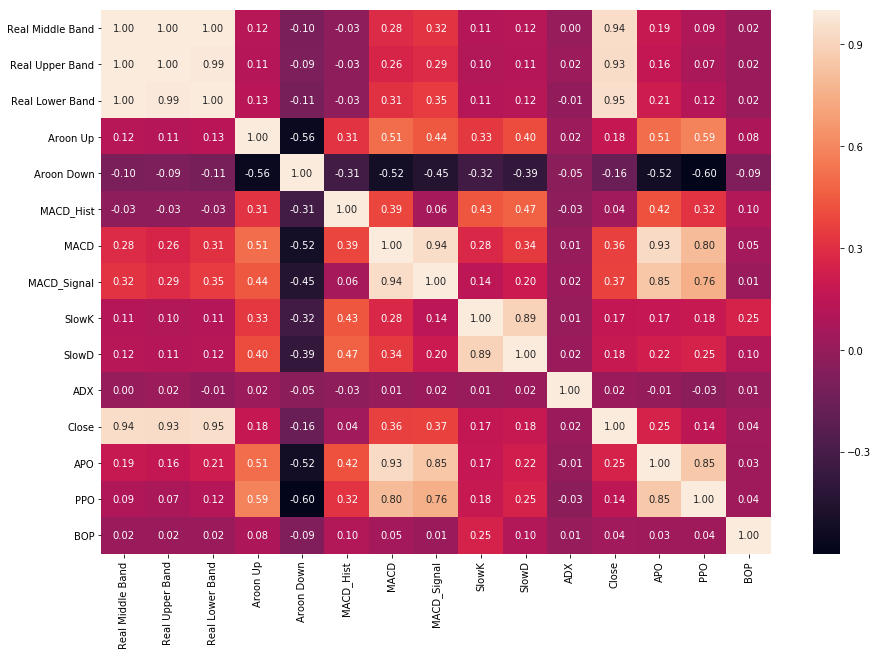

In [9]:
# mencari korelasi antar variabel
import seaborn as sns
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")

Dari sini kita bisa lihat kalau korelasi antar teknikal indikator beragam, mulai dari yg mendekati nol, hingga mendekati 1. Selanjutnya akan dicek statistika deskriptif dari data tersebut.

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data.describe()

,Real Middle Band,Real Upper Band,Real Lower Band,Aroon Up,Aroon Down,MACD_Hist,MACD,MACD_Signal,SlowK,SlowD,ADX,Close,APO,PPO,BOP
count,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00,4993.00
mean,47.94,50.54,45.33,54.77,43.58,0.00,0.13,0.13,52.72,52.73,20.47,44.14,0.13,0.13,0.02
std,31.46,33.28,29.82,36.08,36.05,0.38,1.14,1.05,25.42,23.52,8.07,32.01,1.70,3.03,0.52
min,16.45,17.78,9.43,0.00,0.00,-3.48,-8.91,-7.21,1.12,3.29,6.49,15.15,-14.21,-34.73,-0.99
25%,26.92,27.99,25.64,20.00,10.00,-0.12,-0.28,-0.27,31.00,33.18,14.28,26.50,-0.42,-1.12,-0.42
50%,32.13,34.14,30.27,60.00,35.00,0.00,0.13,0.12,53.67,53.63,19.54,29.64,0.16,0.43,0.00
75%,57.81,62.10,53.98,90.00,80.00,0.12,0.54,0.50,75.26,73.18,24.88,46.60,0.65,1.62,0.47
max,179.33,196.19,165.54,100.00,100.00,2.91,6.81,6.22,99.31,98.12,52.21,188.70,11.51,12.26,1.00


Selanjutnya kita cek dimensi datanya.

In [11]:
# convert to datetime
data['Date'] = pd.to_datetime(data['Date'])
# set the index
data.set_index('Date', inplace=True)

In [12]:
data.shape

(4993, 15)

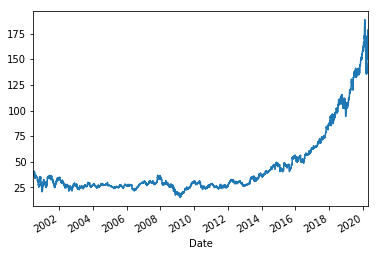

In [13]:
# Plot data outputnya, dalam hal ini data Close
y_close = data.Close
y_close.plot()

Terlihat kalau trennya cenderung menarik, jadi untuk pembagian datanya pastikan data trainingnya bisa menangkap tren tersebut.

Tapi, sebelum ke pembagian data, dilakukan standarisasi data terlebih dahulu.

In [14]:
data.head()

,Real Middle Band,Real Upper Band,Real Lower Band,Aroon Up,Aroon Down,MACD_Hist,MACD,MACD_Signal,SlowK,SlowD,ADX,Close,APO,PPO,BOP
Date,,,,,,,,,,,,,,,
2000-06-19,67.06,74.38,59.74,100,25,1.02,1.02,-0.00,95.19,82.55,16.27,36.84,2.34,3.48,0.62
2000-06-20,67.60,75.55,59.64,100,20,1.08,1.35,0.27,95.02,92.31,17.30,37.47,2.83,4.19,0.71
2000-06-21,68.47,77.99,58.95,100,15,1.43,2.05,0.63,93.36,94.52,19.03,40.34,3.54,5.22,0.70
2000-06-22,69.19,79.81,58.56,95,10,1.51,2.51,1.00,86.65,91.67,20.67,39.94,4.00,5.85,-0.56
2000-06-23,70.00,80.62,59.37,90,5,1.33,2.67,1.34,73.72,84.58,21.62,38.84,4.21,6.13,-0.74


In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data) # datanya akan menjadi array

pd.DataFrame(data_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.31,0.32,0.32,1.00,0.25,0.70,0.63,0.54,0.96,0.84,0.21,0.13,0.64,0.81,0.81
1,0.31,0.32,0.32,1.00,0.20,0.71,0.65,0.56,0.96,0.94,0.24,0.13,0.66,0.83,0.86
2,0.32,0.34,0.32,1.00,0.15,0.77,0.70,0.58,0.94,0.96,0.27,0.15,0.69,0.85,0.85
3,0.32,0.35,0.31,0.95,0.10,0.78,0.73,0.61,0.87,0.93,0.31,0.14,0.71,0.86,0.22
4,0.33,0.35,0.32,0.90,0.05,0.75,0.74,0.64,0.74,0.86,0.33,0.14,0.72,0.87,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,0.87,0.92,0.81,1.00,0.10,1.00,0.87,0.68,0.92,0.91,0.34,0.94,0.95,0.88,0.39
4989,0.89,0.93,0.83,0.95,0.05,0.94,0.89,0.72,0.83,0.91,0.35,0.92,0.97,0.88,0.29
4990,0.90,0.92,0.86,0.90,0.00,0.81,0.86,0.76,0.54,0.77,0.35,0.88,0.99,0.89,0.12
4991,0.90,0.92,0.87,0.85,0.00,0.76,0.86,0.78,0.41,0.59,0.34,0.91,1.00,0.89,0.83


Seperti yg dapat dilihat dari tabel diatas, seluruh data telah berhasil distandarisasi. 

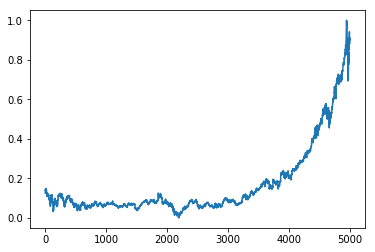

In [16]:
# cek grafik
y_close_scaled = data_scaled[:,11]
plt.plot(y_close_scaled)
plt.show()

Sekarang akan dilakukan pembagian data training dan testing, dengan pembagian **70%** untuk training, **20%** untuk validation dan **10%** untuk testing.

In [17]:
# pembagian dataset
n_train = round(len(data_scaled)*0.9) # % untuk training

train = data_scaled[:n_train,:data.shape[1]]
test = data_scaled[n_train:,:data.shape[1]]

y_close_train = y_close_scaled[:n_train,]
y_close_test = y_close_scaled[n_train:,]

# Cek shape
print('Ukuran data asli: ', data_scaled.shape)
print('x_train: ', train.shape)
print('x_test: ', test.shape)
print('y_train: ', y_close_train.shape)
print('y_test: ', y_close_test.shape)

Ukuran data asli:  (4993, 15)
x_train:  (4494, 15)
x_test:  (499, 15)
y_train:  (4494,)
y_test:  (499,)


Selanjutnya kita akan membuat data time series menjadi matriks **gambar 2D**.

In [18]:
# Membuat data time series menjadi matriks gambar 2D
import numpy as np

def to_sequences(seq_size, data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)


timesteps = 10  #Setiap variabel akan menciptakan 10 variables (features) baru
                #Data akan berkurang sebayak 11 observasi

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (4483, 10, 1, 15)
Shape of x_test: (488, 10, 1, 15)
Shape of y_train: (4483,)
Shape of y_test: (488,)


In [19]:
# reshape data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))

print(x_train.shape)

(4483, 1, 10, 15)


In [20]:
data.shape[1]

15

Selanjutnya kita akan masuk ke model **CNN**.

In [21]:
#Untuk setiap observasi, mula-mula lakukan convolution pada matriks (10,5) 
#Pada contoh ini pada setiap observasi hanya dilakukan convolution sekali saja 
#dengan filter (kernel) berukuran (1,4). Hasilnya matriks data berukuran (10,2)

cnn = Sequential()
cnn.add(Conv2D(5, kernel_size = (1, 3), strides = (1, 1),  padding = 'same', # sebelumnya padding = 'valid'
               activation = 'relu', input_shape = (1,10,15)))

#Pada setiap baris dari matriks (10,2) yang dihasilkan oleh convolution akan 
#dilih satu nilai yang terbesar sebagi wakilnya melalui penggunaan 
#MaxPooling dengan filter (1,2)
#Hasilnya berupa matriks (vektor) berukuran (10,1)

cnn.add(MaxPooling2D(pool_size = (1,2)))

#Matriks berukuran (10,1) hasil dari MaxPooling ini akan dipandang 
#sebagi input bagi hidden layer dengan 7 neurons

cnn.add(Flatten())

cnn.add(Dropout(0.1))

#cnn.add(Dense(7, activation="relu"))
cnn.add(Dense(30, activation="relu"))

cnn.summary()   
cnn.add(Dense(1, activation="relu"))
cnn.summary()
    
# define optimizer and objective, compile cnn

cnn.compile(loss='mean_squared_error', optimizer='nadam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="CNN_Parameters_MSFT.hdf5", verbose=0, save_best_only=True) # save best model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 10, 5)          230       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 5, 5)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                780       
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1

Train data, dengan **validation split 0.2**

In [22]:
tic = datetime.now()

history = cnn.fit(x_train,y_train,validation_split=0.2,callbacks=[checkpointer],verbose=2,epochs = 1000)
#cnn.fit(x_train,y_train,validation_split=0.2,verbose=2,epochs = 1000)

toc = datetime.now()

print("Waktu yang diperlukan untuk menyelesaikan iterasi: ", toc-tic)

Train on 3586 samples, validate on 897 samples
Epoch 1/1000
 - 5s - loss: 0.0045 - val_loss: 0.0554
Epoch 2/1000
 - 0s - loss: 9.9364e-04 - val_loss: 0.0333
Epoch 3/1000
 - 0s - loss: 6.9018e-04 - val_loss: 0.0327
Epoch 4/1000
 - 0s - loss: 6.1171e-04 - val_loss: 0.0347
Epoch 5/1000
 - 0s - loss: 5.5845e-04 - val_loss: 0.0190
Epoch 6/1000
 - 0s - loss: 5.2203e-04 - val_loss: 0.0191
Epoch 7/1000
 - 0s - loss: 4.7897e-04 - val_loss: 0.0306
Epoch 8/1000
 - 0s - loss: 4.4900e-04 - val_loss: 0.0251
Epoch 9/1000
 - 0s - loss: 4.0232e-04 - val_loss: 0.0195
Epoch 10/1000
 - 0s - loss: 3.4891e-04 - val_loss: 0.0117
Epoch 11/1000
 - 0s - loss: 2.9587e-04 - val_loss: 0.0065
Epoch 12/1000
 - 0s - loss: 2.1895e-04 - val_loss: 0.0034
Epoch 13/1000
 - 0s - loss: 1.7946e-04 - val_loss: 0.0049
Epoch 14/1000
 - 0s - loss: 1.6300e-04 - val_loss: 0.0015
Epoch 15/1000
 - 0s - loss: 1.2870e-04 - val_loss: 0.0017
Epoch 16/1000
 - 0s - loss: 1.1178e-04 - val_loss: 0.0043
Epoch 17/1000
 - 0s - loss: 1.0682e-04

In [23]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


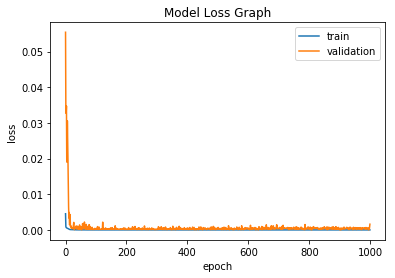

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Predict Train Data

In [25]:
#Di atas tadi telah disimpan parameter dari model CNN dengan nama CNN_Parameters_BNI dalam
#format hdf5. Ketika Notebook ini dijalankan, maka akan tersimpan parameter 
#tersebut di folder yang sama. Sekarang dipanggil lagi utnuk melakukan prediksi.

#cnn.load_weights('CNN_Parameters_saham.hdf5')

pred = cnn.predict(x_train)
print("Shape: {}".format(pred.shape))
print(pred[100])

Shape: (4483, 1)
[0.08289921]


In [26]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_train, pred))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.02576125850660344


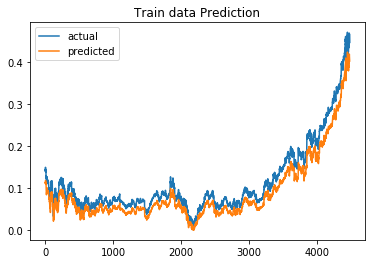

In [27]:
plt.plot(y_train, label = 'actual')
plt.plot(pred,   label = 'predicted')
plt.title('Train data Prediction')
plt.legend()
plt.show()

### Predict Test Data

In [28]:
#Di atas tadi telah disimpan parameter dari model CNN dengan nama CNN_Parameters_BNI dalam
#format hdf5. Ketika Notebook ini dijalankan, maka akan tersimpan parameter 
#tersebut di folder yang sama. Sekarang dipanggil lagi utnuk melakukan prediksi.

#cnn.load_weights('CNN_Parameters_saham.hdf5')

pred = cnn.predict(x_test)
print("Shape: {}".format(pred.shape))
print(pred[100])

Shape: (488, 1)
[0.51590323]


In [29]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.06868121215958564


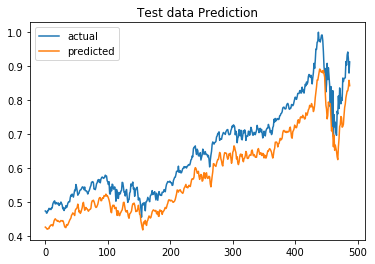

In [30]:
plt.plot(y_test, label = 'actual')
plt.plot(pred,   label = 'predicted')
plt.title('Test data Prediction')
plt.legend()
plt.show()